(29, 4)
[[[ -734.511    -0.     1575.163]
  [ -367.255  -636.105  1575.163]
  [-1505.152    -0.      869.   ]
  [ -752.576 -1303.5     869.   ]]

 [[ -367.255  -636.105  1575.163]
  [  367.255  -636.105  1575.163]
  [ -752.576 -1303.5     869.   ]
  [  752.576 -1303.5     869.   ]]

 [[  367.255  -636.105  1575.163]
  [  734.511     0.     1575.163]
  [  752.576 -1303.5     869.   ]
  [ 1505.152     0.      869.   ]]

 [[  734.511     0.     1575.163]
  [  367.255   636.105  1575.163]
  [ 1505.152     0.      869.   ]
  [  752.576  1303.5     869.   ]]

 [[  367.255   636.105  1575.163]
  [ -367.255   636.105  1575.163]
  [  752.576  1303.5     869.   ]
  [ -752.576  1303.5     869.   ]]

 [[ -367.255   636.105  1575.163]
  [ -734.511     0.     1575.163]
  [ -752.576  1303.5     869.   ]
  [-1505.152     0.      869.   ]]

 [[-1505.152    -0.      869.   ]
  [-1064.303 -1064.303   869.   ]
  [-1738.       -0.        0.   ]
  [-1228.952 -1228.952     0.   ]]

 [[-1064.303 -1064.303   8

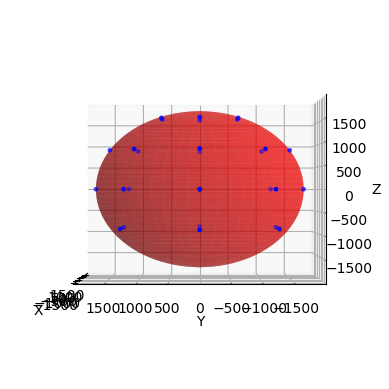

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Radius of the sphere
r = 1738

# Sample 2D array of longitudes and latitudes in degrees
img_num = 29

# Array for the Lon and Lat of the top left corner of each image
long_lat_array = np.zeros([img_num,2])
# Array for change in Lon and Lat going from top left to bottom right of image 
delta_long_lat = np.zeros([img_num,2])

for i in range(img_num):
    if i < 6:
        long_lat_array[i,0] = -180 + (60*i)
        long_lat_array[i,1] = 65
        
        delta_long_lat[i,0] = 60
        delta_long_lat[i,1] = -35
        
    if 6 <= i < 14:
        long_lat_array[i,0] = -180 + (45*(i-6))
        long_lat_array[i,1] = 30

        delta_long_lat[i,0] = 45
        delta_long_lat[i,1] = -30
    
    if 14 <= i < 22:
        long_lat_array[i,0] = -180 + (45*(i-14))
        long_lat_array[i,1] = 0

        delta_long_lat[i,0] = 45
        delta_long_lat[i,1] = -30
    
    if 22 <= i < 28:
        long_lat_array[i,0] = -180 + (60*(i-22))
        long_lat_array[i,1] = -30

        delta_long_lat[i,0] = 60
        delta_long_lat[i,1] = -35

# Array containing the long and latitudes of all the corners of every image
rect_MC = np.zeros([img_num,4,2])

for i in range(29):
    rect_MC[i,0] = long_lat_array[i] 
    
    rect_MC[i,1,0] = long_lat_array[i,0] + delta_long_lat[i,0]
    rect_MC[i,1,1] = long_lat_array[i,1]

    rect_MC[i,2,0] = long_lat_array[i,0] 
    rect_MC[i,2,1] = long_lat_array[i,1] + delta_long_lat[i,1]

    rect_MC[i,3,0] = long_lat_array[i,0] + delta_long_lat[i,0]
    rect_MC[i,3,1] = long_lat_array[i,1] + delta_long_lat[i,1]


# Convert from degrees to radians to use in np functions
longitudes = np.radians(long_lat_array[:, 0])
latitudes = np.radians(long_lat_array[:, 1])

longitudes1 = np.radians(rect_MC[:,:, 0])
latitudes1 = np.radians(rect_MC[:,:, 1])



# Convert long and lat to Cartesian coordinates
x = r * np.cos(latitudes) * np.cos(longitudes)
y = r * np.cos(latitudes) * np.sin(longitudes)
z = r * np.sin(latitudes)

x1 = r * np.cos(latitudes1) * np.cos(longitudes1)
y1 = r * np.cos(latitudes1) * np.sin(longitudes1)
z1 = r * np.sin(latitudes1)
print(x1.shape)

Rectangle_corners = np.zeros([29,4,3])
for i in range(29):
    for j in range(4):
            Rectangle_corners[i,j,0] = np.round(x1[i,j],3)
            Rectangle_corners[i,j,1] = np.round(y1[i,j],3)
            Rectangle_corners[i,j,2] = np.round(z1[i,j],3)

print(Rectangle_corners)

# Plotting the sphere
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='b', s=6)  # Plot points
ax.view_init(elev=0., azim=180)

# Drawing the surface of the sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 50)
x_sphere = r * np.outer(np.cos(u), np.sin(v))
y_sphere = r * np.outer(np.sin(u), np.sin(v))
z_sphere = r * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='red', alpha=0.5)

# Labeling the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


In [45]:
!pip install plotly


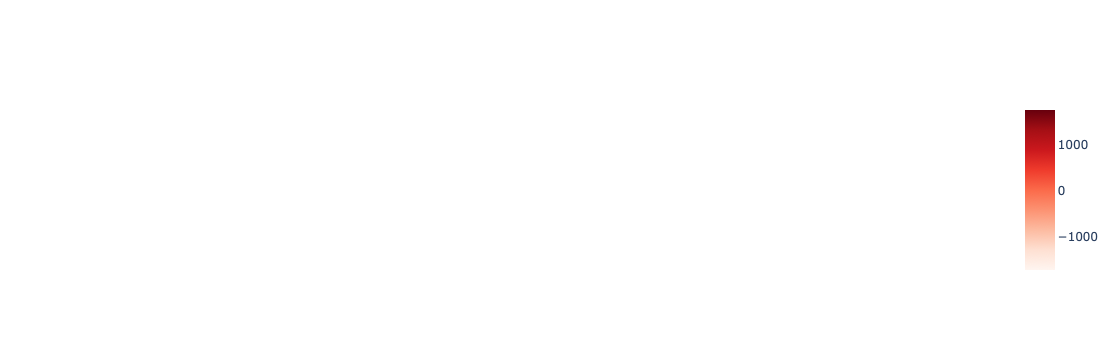

In [112]:
import plotly.graph_objects as go

# Plot points onto sphere
scatter = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=2, color='blue'))

# Drawing the surface of the sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 50)
x_sphere = r * np.outer(np.cos(u), np.sin(v))
y_sphere = r * np.outer(np.sin(u), np.sin(v))
z_sphere = r * np.outer(np.ones(np.size(u)), np.cos(v))

surface = go.Surface(x=x_sphere, y=y_sphere, z=z_sphere, opacity=0.1, colorscale='reds')
axlim = 2000
fig = go.Figure(data=[scatter, surface])
fig.update_layout(scene=dict(
                    xaxis = dict(nticks=4, range=[-axlim,axlim],),
                    yaxis = dict(nticks=4, range=[-axlim,axlim],),
                    zaxis = dict(nticks=4, range=[-axlim,axlim],),
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z'))
fig.show()
